<a href="https://colab.research.google.com/github/albertoBetancourt/data_science/blob/master/Proyecto_Python_ciencia_datos2_consoles_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/CienciaDeDatos/best-selling game consoles.csv'

df = pd.read_csv(path, encoding='ISO-8859-1')

###Etapa de exploración

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released Year         51 non-null     int64  
 4   Discontinuation Year  51 non-null     int64  
 5   Units sold (million)  51 non-null     float64
 6   Remarks               16 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


In [169]:
df.head() #Imprimir solo las primeras 5 filas

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN


In [170]:
df.describe()

,Released Year,Discontinuation Year,Units sold (million)
count,51.000000,51.000000,51.000000
mean,1996.058824,1844.803922,35.549412
std,12.378064,543.657319,42.608844
min,1976.000000,0.000000,1.000000
25%,1987.500000,1992.000000,3.200000
50%,1994.000000,1998.000000,13.560000
75%,2004.500000,2011.500000,60.205000
max,2020.000000,2020.000000,155.000000


In [171]:
df.isnull().sum()

,0
Console Name,0
Type,0
Company,0
Released Year,0
Discontinuation Year,0
Units sold (million),0
Remarks,35


In [172]:
df.duplicated().sum()

0

### Limpieza

In [173]:
# Si la fecha de discontinuación es anterior a la de lanzamiento, las intercambiamos

df['Released Year'], df['Discontinuation Year'] = np.where(
    df['Released Year'] > df['Discontinuation Year'],
    (df['Discontinuation Year'], df['Released Year']),
    (df['Released Year'], df['Discontinuation Year'])
)

In [174]:
# Intercambiar los valores de las columnas 'Released Year' y 'Discontinuation Year' si release year es igual 0
df.loc[df['Released Year'] == 0, ['Released Year', 'Discontinuation Year']] = \
    df.loc[df['Released Year'] == 0, ['Discontinuation Year', 'Released Year']].values

# Verificar los cambios
print(f"Datos después de la corrección:\n{df[['Console Name', 'Released Year', 'Discontinuation Year']].head()}")


Datos después de la corrección:
      Console Name  Released Year  Discontinuation Year
0    PlayStation 2           2000                  2013
1      Nintendo DS           2004                  2013
2  Nintendo Switch           2017                     0
3         Game Boy           1989                  2003
4   Game Boy Color           1998                  2003


### Creación Columnas

In [175]:
df.head()

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN


In [176]:
from datetime import datetime

current_year = datetime.now().year

# Calcular la columna Lifespan (años)
df['Lifespan (years)'] = df.apply(
    lambda row: (current_year - row['Released Year']) if row['Discontinuation Year'] == 0
    else (row['Discontinuation Year'] - row['Released Year']),
    axis=1
)

# Mostrar el resultado
df[['Console Name', 'Released Year', 'Discontinuation Year', 'Lifespan (years)']].head()

,Console Name,Released Year,Discontinuation Year,Lifespan (years)
0,PlayStation 2,2000,2013,13
1,Nintendo DS,2004,2013,9
2,Nintendo Switch,2017,0,7
3,Game Boy,1989,2003,14
4,Game Boy Color,1998,2003,5


In [177]:
# Calcular las ventas promedio por año
df['Units Sold Per Year (millions/year)'] = df.apply(
    lambda row: row['Units sold (million)'] / row['Lifespan (years)']
    if row['Lifespan (years)'] > 0 else np.nan,  # Evitar divisiones por cero
    axis=1
)

# Mostrar el resultado
df[['Console Name', 'Units sold (million)', 'Lifespan (years)', 'Units Sold Per Year (millions/year)']].head()

,Console Name,Units sold (million),Lifespan (years),Units Sold Per Year (millions/year)
0,PlayStation 2,155.00,13,11.923077
1,Nintendo DS,154.02,9,17.113333
2,Nintendo Switch,122.55,7,17.507143
3,Game Boy,64.42,14,4.601429
4,Game Boy Color,44.06,5,8.812000


In [178]:
# Crear la columna 'Decade Released'
df['Decade Released'] = (df['Released Year'] // 10) * 10

# Convertir la década a formato de string, añadiendo 's' al final para obtener la forma correcta (ej. "1980s")
df['Decade Released'] = df['Decade Released'].astype(str) + 's'

# Mostrar el resultado con la nueva columna
df[['Console Name', 'Released Year', 'Decade Released']].head()

,Console Name,Released Year,Decade Released
0,PlayStation 2,2000,2000s
1,Nintendo DS,2004,2000s
2,Nintendo Switch,2017,2010s
3,Game Boy,1989,1980s
4,Game Boy Color,1998,1990s


In [179]:
df.head()

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks,Lifespan (years),Units Sold Per Year (millions/year),Decade Released
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million,13,11.923077,2000s
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN,9,17.113333,2000s
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN,7,17.507143,2010s
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...,14,4.601429,1980s
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN,5,8.812000,1990s


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Console Name                         51 non-null     object 
 1   Type                                 51 non-null     object 
 2   Company                              51 non-null     object 
 3   Released Year                        51 non-null     int64  
 4   Discontinuation Year                 51 non-null     int64  
 5   Units sold (million)                 51 non-null     float64
 6   Remarks                              16 non-null     object 
 7   Lifespan (years)                     51 non-null     int64  
 8   Units Sold Per Year (millions/year)  51 non-null     float64
 9   Decade Released                      51 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.1+ KB


### Visualizacion de datos

In [181]:
sales_by_decade_by_company = df.groupby(['Decade Released', 'Company'])['Units sold (million)'].sum()
sales_by_decade_by_company

Decade Released  Company                
1970s            Atari                       30.00
                 Coleco                       1.00
                 Magnavox/Philips             2.00
                 Nintendo                     3.00
1980s            Atari                        3.00
                 Coleco                       2.00
                 Mattel                       3.00
                 NEC                          1.92
                 NEC/Hudson Soft[note 6]     10.00
                 Nintendo                   174.23
                 Sega                        43.75
                 Tectoy                       8.00
1990s            Bandai                       3.50
                 Micro Genius                 6.00
                 Nintendo                   126.09
                 Philips                      1.00
                 Sega                        34.65
                 Sony                       102.49
                 Tectoy                       3.00
2000s            Microsoft                  108.00
                 Nintendo                   358.90
                 Nokia                        3.00
                 Sony                       324.40
2010s            Microsoft                   58.50
                 Nintendo                   220.89
                 Sony                       132.20
2020s            Microsoft                   18.50
                 Sony                        30.00
Name: Units sold (million), dtype: float64

In [182]:
sales_by_decade_by_type = df.groupby(['Decade Released', 'Type'])['Units sold (million)'].sum()
sales_by_decade_by_type

Decade Released  Type               
1970s            Dedicated                4.00
                 Home                    32.00
1980s            Handheld               108.82
                 Home                   130.66
                 Home console add-on      6.42
1990s            Handheld                58.18
                 Home                   216.31
                 Home console add-on      2.24
2000s            Handheld               320.53
                 Home                   473.77
2010s            Dedicated                8.84
                 Handheld                90.94
                 Home                   189.26
                 Hybrid                 122.55
2020s            Home                    48.50
Name: Units sold (million), dtype: float64

### Visualizacion de datos

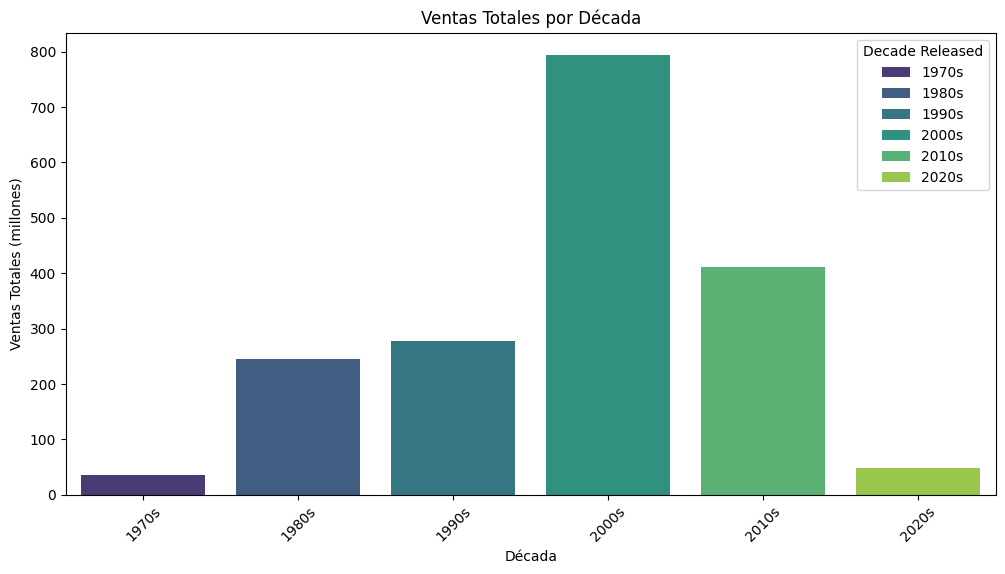

In [183]:
# Ventas por década
sales_by_decade = df.groupby('Decade Released')['Units sold (million)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Decade Released', y='Units sold (million)', data=sales_by_decade, palette='viridis', hue='Decade Released', legend=True)
plt.title('Ventas Totales por Década')
plt.xlabel('Década')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

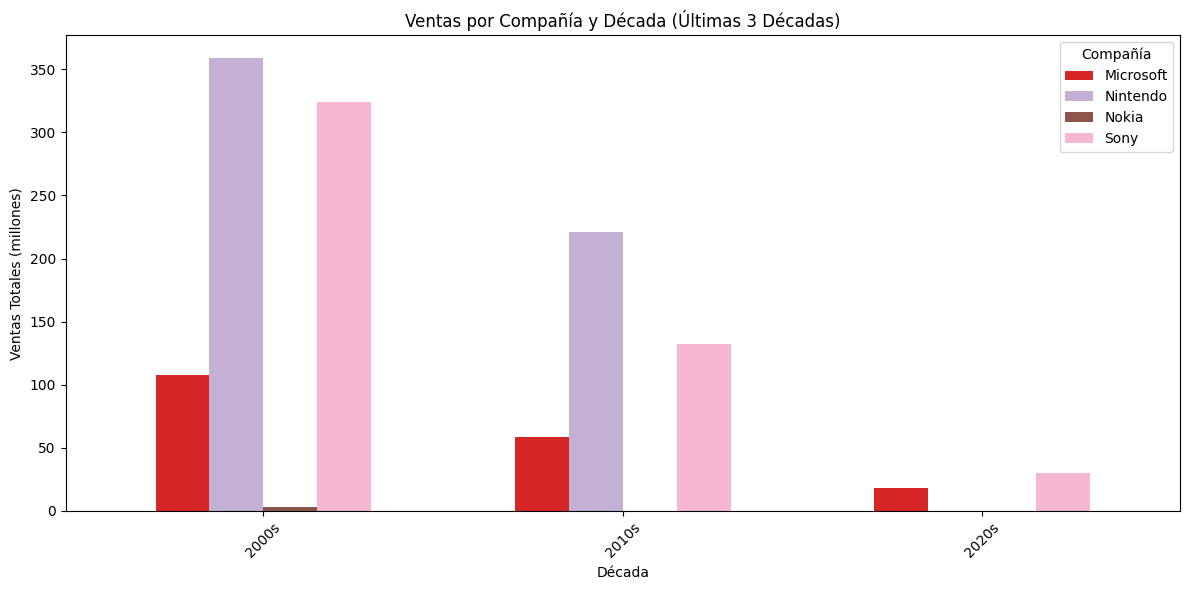

In [184]:
import matplotlib.pyplot as plt

# Filtrar solo las últimas 3 décadas
last_three_decades = sales_by_company_decade.tail(3)

# Filtrar las columnas que contienen datos (solo compañías presentes en las últimas 3 décadas)
filtered_columns = last_three_decades.columns[last_three_decades.sum() > 0]

# Graficar barras agrupadas (lado a lado) con colores personalizados para cada compañía
ax = last_three_decades[filtered_columns].plot(kind='bar', figsize=(12, 6), color=[company_colors[company] for company in filtered_columns], width=0.6)

# Ajustes para la gráfica
plt.title('Ventas por Compañía y Década (Últimas 3 Décadas)')
plt.xlabel('Década')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para que se vean bien

# Colocar la leyenda dentro de la gráfica y solo para las compañías presentes en las últimas 3 décadas
plt.legend(title='Compañía',bbox_to_anchor=(1, 1))  # Leyenda dentro de la gráfica

# Ajustar diseño para que se vea bien
plt.tight_layout()  # Asegura que todo se vea bien ajustado
plt.show()

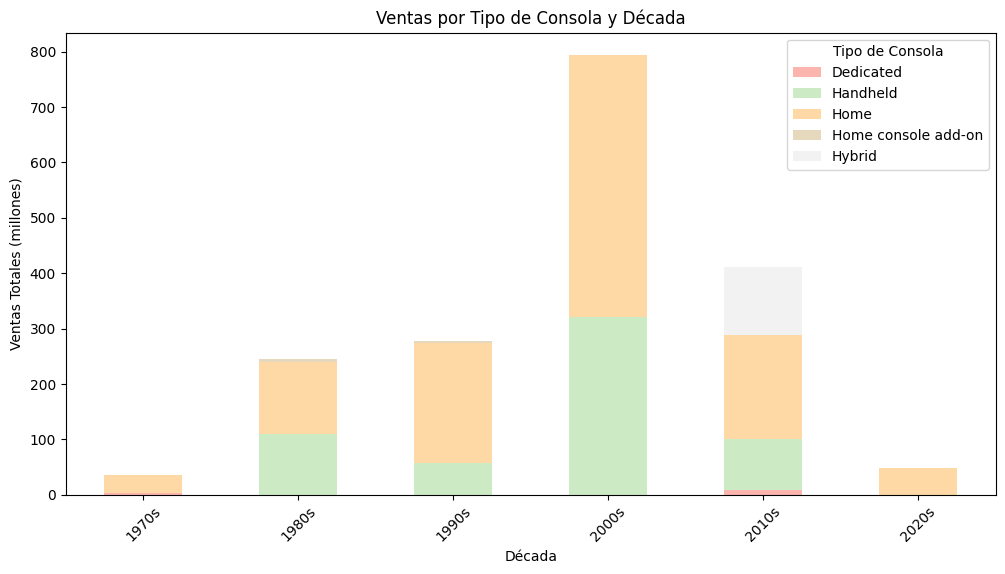

In [185]:
# Ventas por tipo de consola y década
sales_by_type_decade = df.groupby(['Decade Released', 'Type'])['Units sold (million)'].sum().unstack().reset_index()

sales_by_type_decade.set_index('Decade Released', inplace=True)

# Graficar
sales_by_type_decade.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title('Ventas por Tipo de Consola y Década')
plt.xlabel('Década')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Consola')
plt.show()


<ipython-input-186-12a3138ff673>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_consoles_company = df.groupby('Company').apply(lambda x: x.nlargest(2, 'Units sold (million)')).reset_index(drop=True)


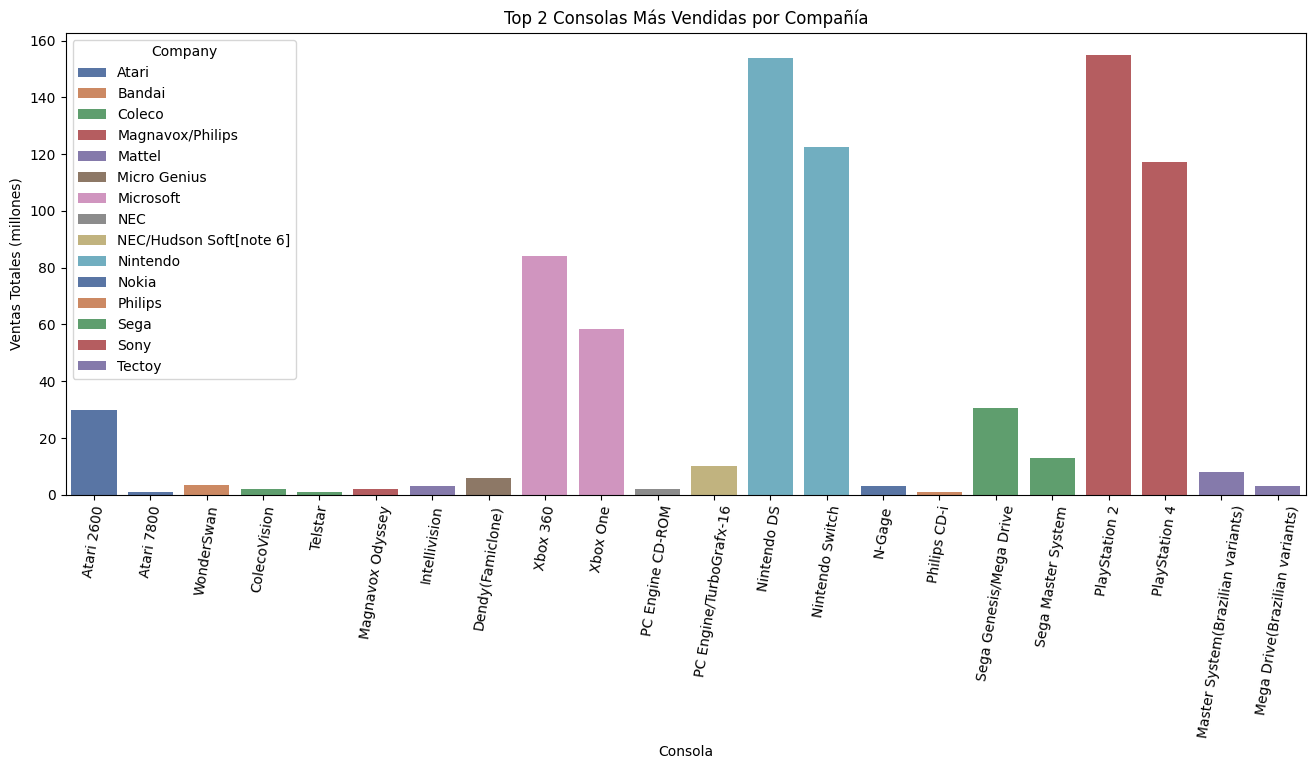

In [186]:
# Top 2 consolas vendidas por cada compañia
top_consoles_company = df.groupby('Company').apply(lambda x: x.nlargest(2, 'Units sold (million)')).reset_index(drop=True)

plt.figure(figsize=(16, 6))
sns.barplot(x='Console Name', y='Units sold (million)', hue='Company', data=top_consoles_company, palette='deep')
plt.title('Top 2 Consolas Más Vendidas por Compañía')
plt.xlabel('Consola')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=81)
plt.show()

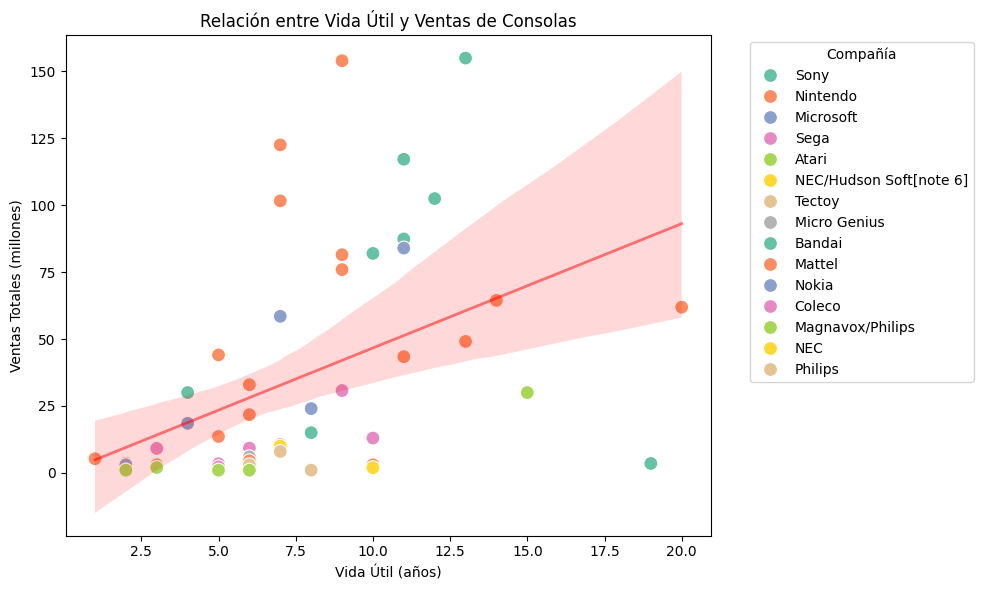

In [187]:
# Crear el gráfico de dispersión con la leyenda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lifespan (years)', y='Units sold (million)', data=df, hue='Company', palette='Set2', s=100)

# Agregar la línea de tendencia con transparencia
sns.regplot(x='Lifespan (years)', y='Units sold (million)', data=df, scatter=False, color='blue',
            line_kws={"color": "red", "linewidth": 2, "alpha": 0.5})

# Ajustes del gráfico
plt.title('Relación entre Vida Útil y Ventas de Consolas')
plt.xlabel('Vida Útil (años)')
plt.ylabel('Ventas Totales (millones)')

# Ajustar la leyenda fuera del gráfico
plt.legend(title='Compañía', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()  # Asegura que todo se vea bien ajustado
plt.show()

<ipython-input-188-7c50f842a80c>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_by_type = df.groupby('Type').apply(lambda x: x.nlargest(1, 'Units sold (million)')).reset_index(drop=True)


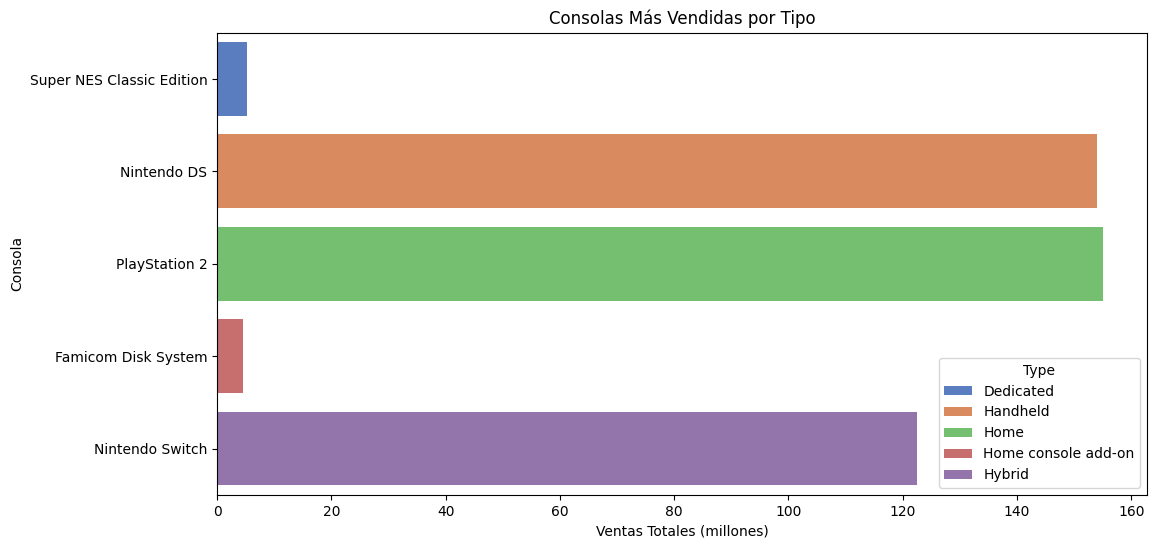

In [188]:
top_by_type = df.groupby('Type').apply(lambda x: x.nlargest(1, 'Units sold (million)')).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Units sold (million)', y='Console Name', hue='Type', data=top_by_type, palette='muted')
plt.title('Consolas Más Vendidas por Tipo')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Consola')
plt.show()

<ipython-input-189-89bca119f71b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Units sold (million)', y='Console Name', data=top_6_consoles, palette='viridis')


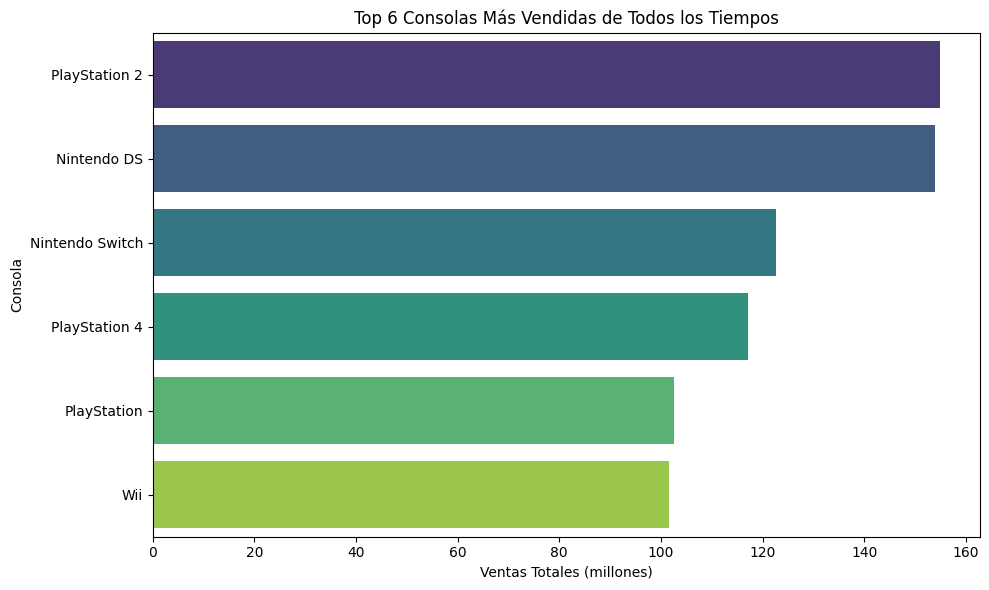

In [189]:
# Ordenar el dataframe por 'Units sold (million)' de manera descendente
top_6_consoles = df.sort_values('Units sold (million)', ascending=False).head(6)

# Crear la gráfica de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Units sold (million)', y='Console Name', data=top_6_consoles, palette='viridis')

# Ajustar el título y etiquetas
plt.title('Top 6 Consolas Más Vendidas de Todos los Tiempos')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Consola')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta todo para que se vea bien
plt.show()